# **Data Cleaning**

In [2]:
# Import relevant modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read in the data

data = pd.read_excel("./pwt100.xlsx", sheet_name = "Data", header = 0)

# Clean the data

#Select the country to analyse
country_selection = "Germany"

# Extract relevant columns
data = data.loc[:, ("country", "year", "rgdpna", "pop", "rnna", "emp", "hc")]

# Calculate GDP per capita and per worker
data["rgdpna_pc"] = data["rgdpna"] / data["pop"]
data["rgdpna_pw"] = data["rgdpna"] / data["emp"]

# Filter for the country of choice
data = data.loc[data["country"] == country_selection,:]
data = data.reset_index(drop = True)

# Remove rows with missing data
ymax = data.loc[data["rgdpna"] > 0, "year"].max()
ymin = data.loc[data["rgdpna"] > 0, "year"].min()
data = data.loc[data["year"] >= ymin, :]

# Check structure of data is what is expected
data.head()

,country,year,rgdpna,pop,rnna,emp,hc,rgdpna_pc,rgdpna_pw
0,Germany,1950,495205.0000,68.734097,1918304.625,30.855808,2.426997,7204.648339,16049.004319
1,Germany,1951,543256.9375,69.073867,2051990.875,31.436510,2.469304,7864.869267,17281.082920
2,Germany,1952,593964.5000,69.448821,2209629.750,32.024281,2.512348,8552.549804,18547.317530
3,Germany,1953,646873.8125,69.846895,2367170.500,32.835850,2.556143,9261.310953,19700.230607
4,Germany,1954,697127.4375,70.264068,2552261.250,33.835823,2.587326,9921.535351,20603.235697


# **Trend paths**

In [4]:
# Define regression function

def regression_coefs(Y, *args):
    T = len(Y)

    X = np.concatenate([arg[:, None] for arg in args], axis=1)

    XX = X.T @ X
    XY = X.T @ Y

    coefs = np.linalg.inv(XX) @ XY
    return coefs


In [5]:
# Calculate the trend time paths for (the natural log of) real GDP

rgdpna = data["rgdpna"]

Y = rgdpna
T = len(Y)

# Calculate each trend line before deciding which is most suitable

# Additive linear Model: y = a + bt + u
x1 = np.empty(T)
x2 = np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1

a_add_lin, b_add_lin = regression_coefs(Y, x1, x2)

rgdpna_add_lin = np.empty(T)

for t in range(T):
    rgdpna_add_lin[t] = a_add_lin + b_add_lin * (t + 1)

# Additive quadratic Model: y = a + bt + ct^2 + u
x1, x2, x3 = [np.empty(T) for j in range(3)]

for t in range(T):
    x1[t] = 1.
    x2[t] = t+1
    x3[t] = t**2

a_add_quad, b1_add_quad, b2_add_quad = regression_coefs(Y, x1, x2, x3)

rgdpna_add_quad = np.empty(T)

for t in range(T):
    rgdpna_add_quad[t] = a_add_quad + b1_add_quad * (t+1) + b2_add_quad * (t**2)

# Exponential linear Model: ln(y) = a + bt + u
x1, x2 = np.empty(T), np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t+1

a_exp_lin, b_exp_lin = regression_coefs(np.log(Y), x1, x2)

rgdpna_exp_lin = np.empty(T)

for t in range(T):
    rgdpna_exp_lin[t] = a_exp_lin + b_exp_lin * (t-1)

# Exponential quadratic model: ln(y) = a + bt + ct^2 + u
x1, x2, x3 = [np.empty(T) for j in range(3)]

for t in range(T):
    x1[t] = 1.
    x2[t] = t+1
    x3[t] = t**2

a_exp_quad, b1_exp_quad, b2_exp_quad = regression_coefs(np.log(Y), x1, x2, x3)

rgdpna_exp_quad = np.empty(T)

for t in range(T):
    rgdpna_exp_quad[t] = a_exp_quad + b1_exp_quad * (t+1) + b2_exp_quad * (t**2)


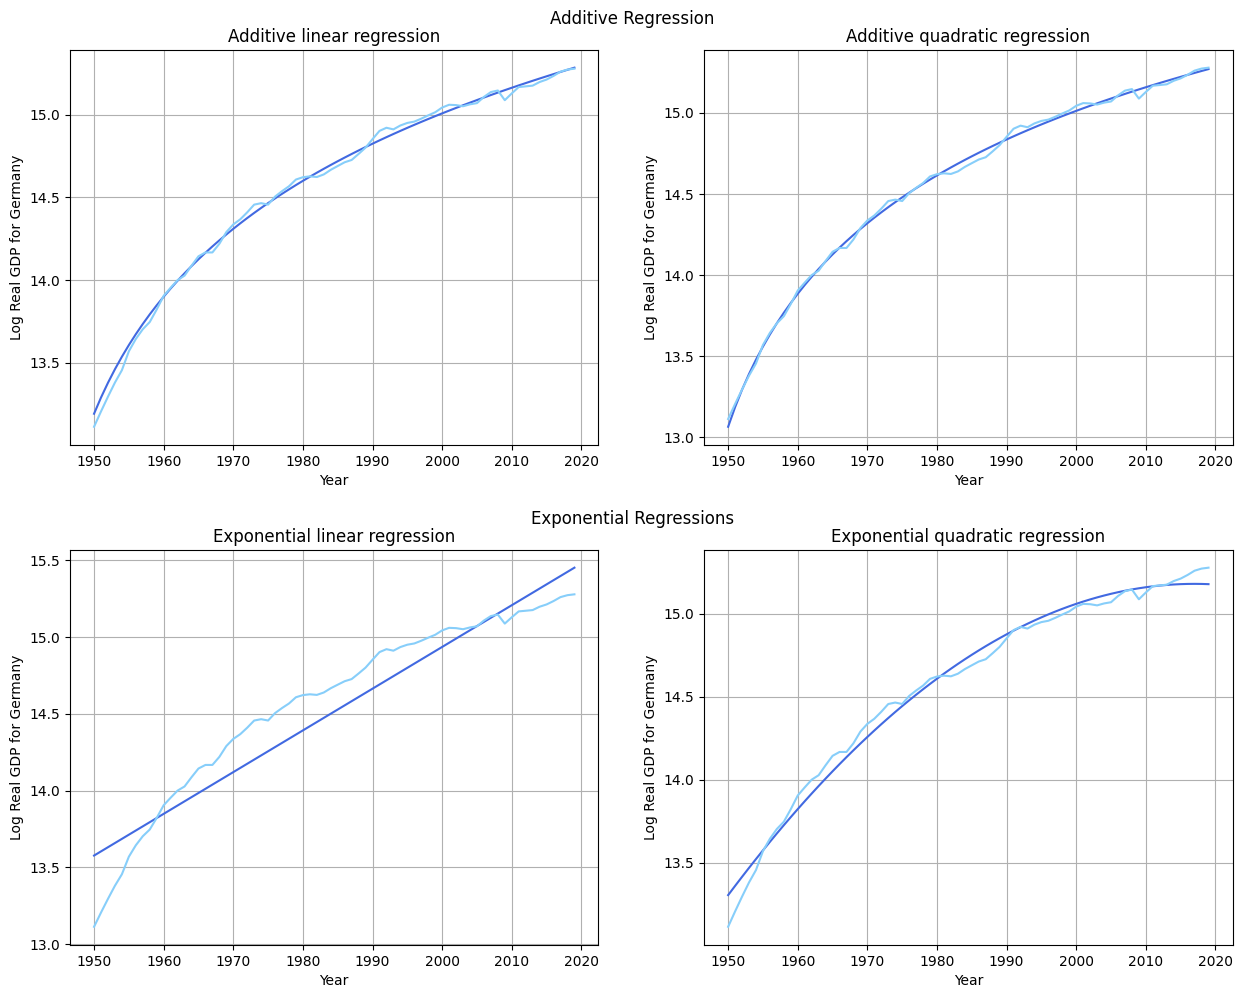

In [6]:
# Plot the data and trend paths

fig = plt.figure(figsize=(15,10))

(fig1,fig2) = fig.subfigures(2,1)

fig1.suptitle("Additive Regression")
fig1.subplots_adjust(wspace=.2, hspace=0.2, top=0.9)

(ax1,ax2) = fig1.subplots(1,2)

ax1.plot(data["year"], np.log(rgdpna_add_lin), color="royalblue")
ax1.plot(data["year"], np.log(data["rgdpna"]), color="lightskyblue")
ax1.set_title("Additive linear regression")
ax1.set_xlabel("Year")
ax1.set_ylabel("Log Real GDP for " + country_selection)
ax1.ticklabel_format(style="plain", axis="y")
ax1.grid(True)

ax2.plot(data["year"], np.log(rgdpna_add_quad), color="royalblue")
ax2.plot(data["year"], np.log(data["rgdpna"]), color="lightskyblue")
ax2.set_title("Additive quadratic regression")
ax2.set_xlabel("Year")
ax2.set_ylabel("Log Real GDP for " + country_selection)
ax2.ticklabel_format(style="plain", axis="y")
ax2.grid(True)

fig2.suptitle("Exponential Regressions")
fig2.subplots_adjust(wspace=.2, hspace=0.2, top=0.9)

(ax3,ax4) = fig2.subplots(1,2)

ax3.plot(data["year"], rgdpna_exp_lin, color="royalblue")
ax3.plot(data["year"], np.log(data["rgdpna"]), color="lightskyblue")
ax3.set_title("Exponential linear regression")
ax3.set_xlabel("Year")
ax3.set_ylabel("Log Real GDP for " + country_selection)
ax3.ticklabel_format(style="plain", axis="y")
ax3.grid(True)

ax4.plot(data["year"], rgdpna_exp_quad, color="royalblue")
ax4.plot(data["year"], np.log(data["rgdpna"]), color="lightskyblue")
ax4.set_title("Exponential quadratic regression")
ax4.set_xlabel("Year")
ax4.set_ylabel("Log Real GDP for " + country_selection)
ax4.ticklabel_format(style="plain", axis="y")
ax4.grid(True)

In [7]:
# Calculate the trend time paths for (the natural log of) real GDP per capita

rgdpna_pc = data["rgdpna_pc"]

Y = rgdpna_pc
T = len(Y)

# Calculate each trend line before deciding which is most suitable

# Additive linear Model
x1 = np.empty(T)
x2 = np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1

a_add_lin, b_add_lin = regression_coefs(Y, x1, x2)

rgdpna_pc_add_lin = np.empty(T)

for t in range(T):
    rgdpna_pc_add_lin[t] = a_add_lin + b_add_lin * (t + 1)

# Additive quadratic Model
x1, x2, x3 = [np.empty(T) for j in range(3)]

for t in range(T):
    x1[t] = 1.
    x2[t] = t+1
    x3[t] = t**2

a_add_quad, b1_add_quad, b2_add_quad = regression_coefs(Y, x1, x2, x3)

rgdpna_pc_add_quad = np.empty(T)

for t in range(T):
    rgdpna_pc_add_quad[t] = a_add_quad + b1_add_quad * (t+1) + b2_add_quad * (t**2)

# Exponential linear Model
x1, x2 = np.empty(T), np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t+1

a_exp_lin, b_exp_lin = regression_coefs(np.log(Y), x1, x2)

rgdpna_pc_exp_lin = np.empty(T)

for t in range(T):
    rgdpna_pc_exp_lin[t] = a_exp_lin + b_exp_lin * (t-1)

# Exponential quadratic model
x1, x2, x3 = [np.empty(T) for j in range(3)]

for t in range(T):
    x1[t] = 1.
    x2[t] = t+1
    x3[t] = t**2

a_exp_quad, b1_exp_quad, b2_exp_quad = regression_coefs(np.log(Y), x1, x2, x3)

rgdpna_pc_exp_quad = np.empty(T)

for t in range(T):
    rgdpna_pc_exp_quad[t] = a_exp_quad + b1_exp_quad * (t+1) + b2_exp_quad * (t**2)

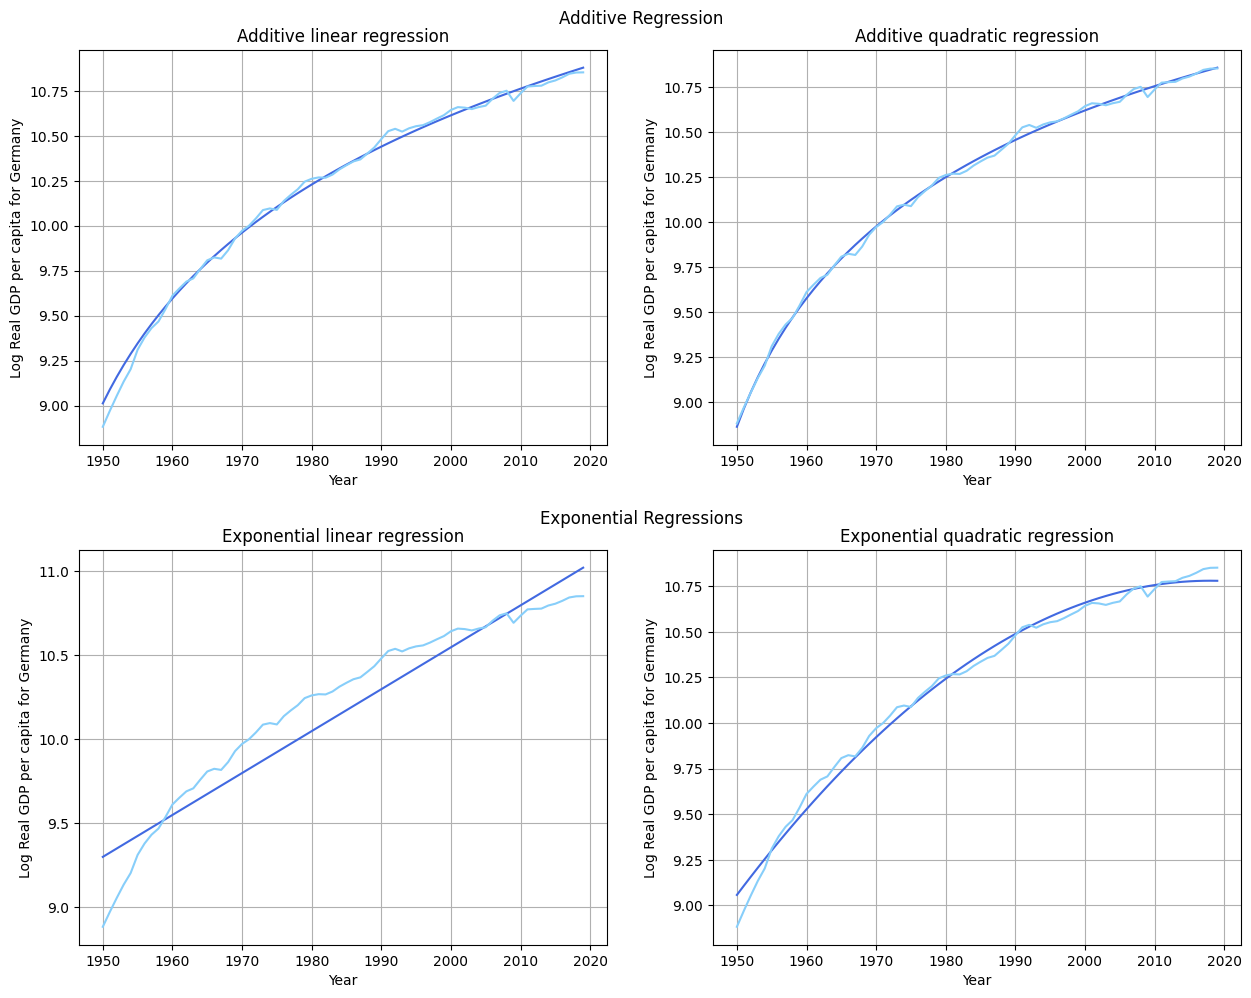

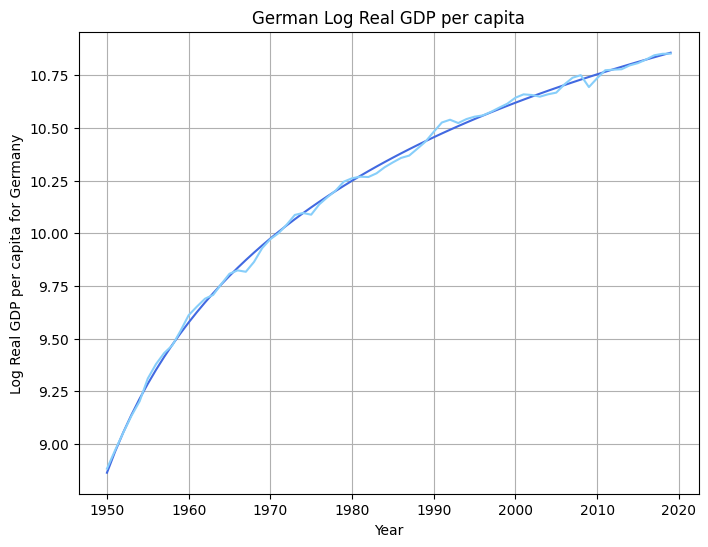

In [8]:
# Plot the data and trend paths

fig = plt.figure(figsize=(15,10))

(fig1,fig2) = fig.subfigures(2,1)

fig1.suptitle("Additive Regression")
fig1.subplots_adjust(wspace=.2, hspace=0.2, top=0.9)

(ax1,ax2) = fig1.subplots(1,2)

ax1.plot(data["year"], np.log(rgdpna_pc_add_lin), color="royalblue")
ax1.plot(data["year"], np.log(data["rgdpna_pc"]), color="lightskyblue")
ax1.set_title("Additive linear regression")
ax1.set_xlabel("Year")
ax1.set_ylabel("Log Real GDP per capita for " + country_selection)
ax1.ticklabel_format(style="plain", axis="y")
ax1.grid(True)

ax2.plot(data["year"], np.log(rgdpna_pc_add_quad), color="royalblue")
ax2.plot(data["year"], np.log(data["rgdpna_pc"]), color="lightskyblue")
ax2.set_title("Additive quadratic regression")
ax2.set_xlabel("Year")
ax2.set_ylabel("Log Real GDP per capita for " + country_selection)
ax2.ticklabel_format(style="plain", axis="y")
ax2.grid(True)

fig2.suptitle("Exponential Regressions")
fig2.subplots_adjust(wspace=.2, hspace=0.2, top=0.9)

(ax3,ax4) = fig2.subplots(1,2)

ax3.plot(data["year"], rgdpna_pc_exp_lin, color="royalblue")
ax3.plot(data["year"], np.log(data["rgdpna_pc"]), color="lightskyblue")
ax3.set_title("Exponential linear regression")
ax3.set_xlabel("Year")
ax3.set_ylabel("Log Real GDP per capita for " + country_selection)
ax3.ticklabel_format(style="plain", axis="y")
ax3.grid(True)

ax4.plot(data["year"], rgdpna_pc_exp_quad, color="royalblue")
ax4.plot(data["year"], np.log(data["rgdpna_pc"]), color="lightskyblue")
ax4.set_title("Exponential quadratic regression")
ax4.set_xlabel("Year")
ax4.set_ylabel("Log Real GDP per capita for " + country_selection)
ax4.ticklabel_format(style="plain", axis="y")
ax4.grid(True)

fig = plt.figure(figsize = (8,6))

ax = fig.subplots(1,1)

ax.plot(data["year"], np.log(rgdpna_pc_add_quad), color="royalblue")
ax.plot(data["year"], np.log(data["rgdpna_pc"]), color="lightskyblue")
ax.set_title("German Log Real GDP per capita")
ax.set_xlabel("Year")
ax.set_ylabel("Log Real GDP per capita for " + country_selection)
ax.ticklabel_format(style="plain", axis="y")
ax.grid(True)

Total GDP growth from 1950 to 2019 was 771.1680011308448%
Total GDP per capita growth from 1950 to 2019 was 616.966772047381%


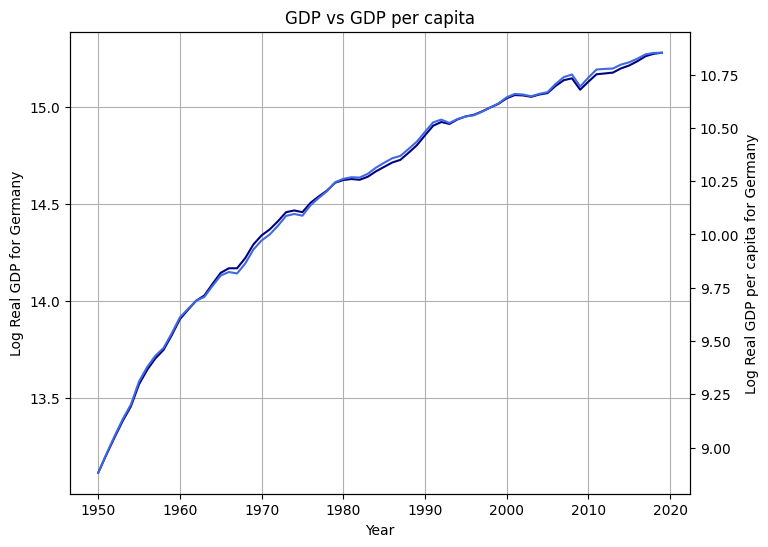

In [9]:
# Graph of GDP per capita and GDP

fig = plt.figure(figsize=(8,6))

(ax1) = fig.subplots(1,1)

ax1.plot(data["year"], np.log(data["rgdpna"]), label="GDP", color="navy")
ax1.set_title("GDP vs GDP per capita")
ax1.set_xlabel("Year")
ax1.set_ylabel("Log Real GDP for " + country_selection)
ax1.ticklabel_format(style="plain", axis="y")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(data["year"], np.log(data["rgdpna_pc"]), label="GDP per Capita", color="royalblue")
ax2.set_ylabel("Log Real GDP per capita for " + country_selection)

GDP_1950 = data.loc[data['year'] == 1950, 'rgdpna'].values[0]
GDP_2019 = data.loc[data['year'] == 2019, 'rgdpna'].values[0]

GDP_pc_1950 = data.loc[data['year'] == 1950, 'rgdpna_pc'].values[0]
GDP_pc_2019 = data.loc[data['year'] == 2019, 'rgdpna_pc'].values[0]

total_GDP_growth = ((GDP_2019 - GDP_1950) / GDP_1950) * 100
total_GDP_pc_growth = ((GDP_pc_2019 - GDP_pc_1950) / GDP_pc_1950) * 100

print("Total GDP growth from 1950 to 2019 was " + str(total_GDP_growth) + "%")
print("Total GDP per capita growth from 1950 to 2019 was " + str(total_GDP_pc_growth) + "%")

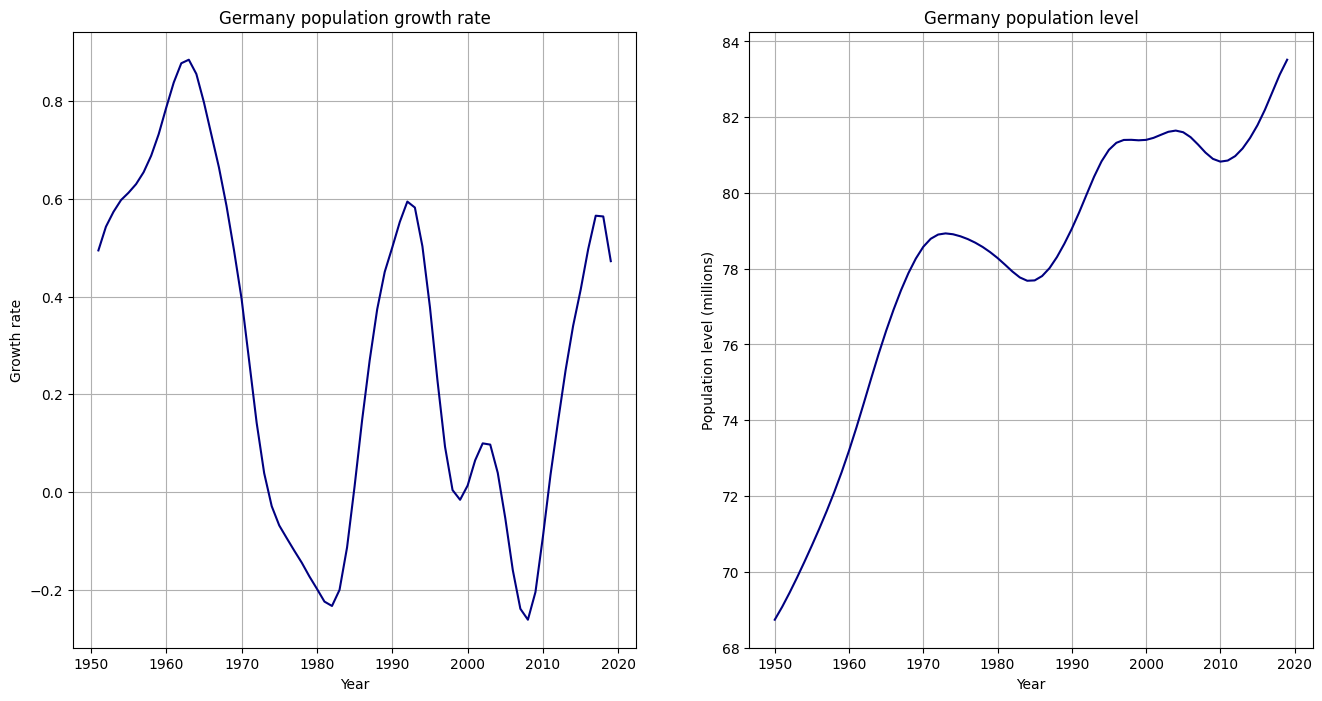

In [10]:
# Population growth

year = data["year"]
time=len(year)

pop = data["pop"]
pop_growth = np.zeros(time)

for t in range(1, time):
  pop_growth[t] = ((pop[t] - pop[t-1]) / pop[t-1]) * 100

fig = plt.figure(figsize = (16,8))

(ax1, ax2) = fig.subplots(1,2)

ax1.plot(year[1:], pop_growth[1:], label="Population growth rate", color="navy")
ax1.set_title(country_selection + " population growth rate")
ax1.set_xlabel("Year")
ax1.set_ylabel("Growth rate")
ax1.grid(True)

ax2.plot(year, pop, label="Population level", color="navy")
ax2.set_title(country_selection + " population level")
ax2.set_xlabel("Year")
ax2.set_ylabel("Population level (millions)")
ax2.grid(True)

# **Extract TFP measure**

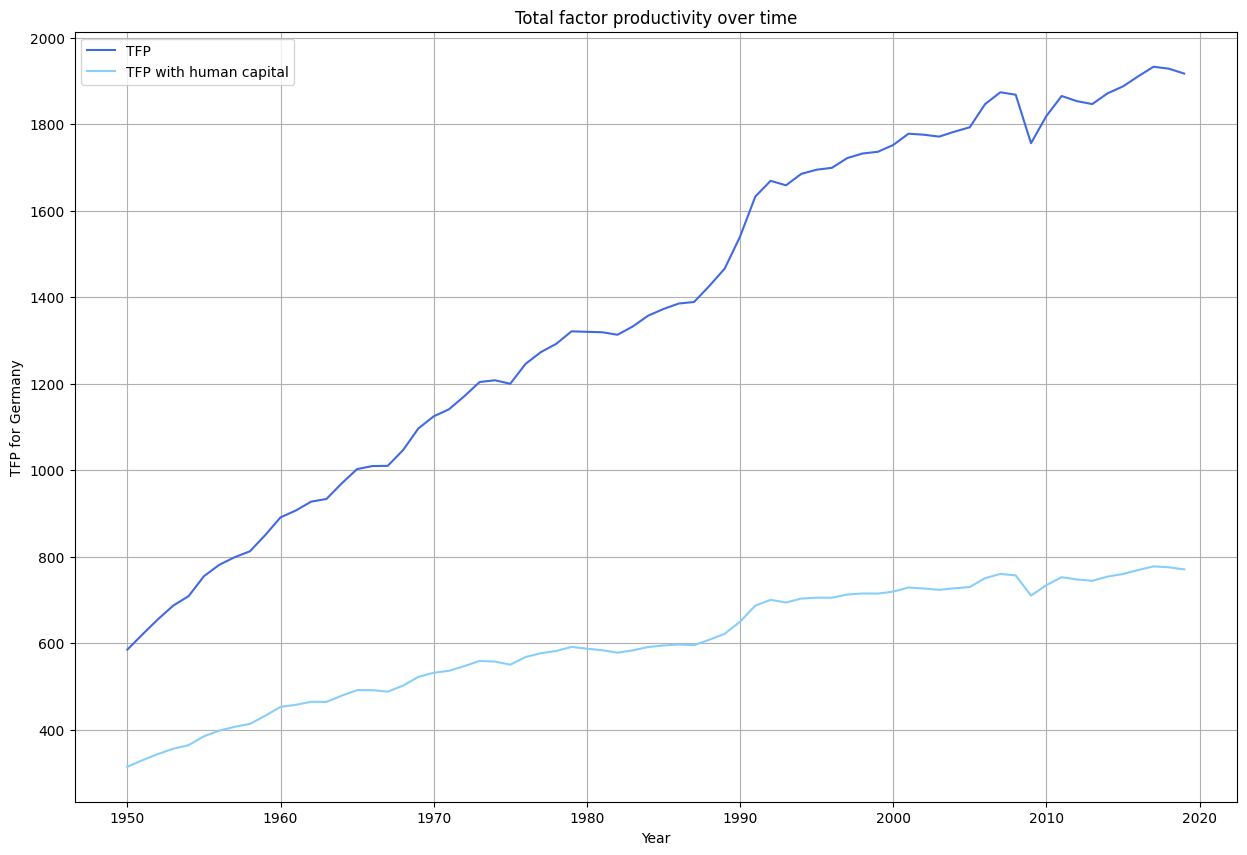

In [13]:
# Extract TFP measure

alpha = 0.3  # benchmark alpha value

rnna = data["rnna"]  # capital variable
emp = data["emp"]  # labour variable
hc = data["hc"]  # human capital variable

# tfp from cobb-douglas production function without human capital
tfp = rgdpna / ((rnna ** alpha) * (emp ** (1 - alpha)))

# tfp from cobb-douglas production function with human capital
tfp_hc = rgdpna / ((rnna ** alpha) * ((hc * emp) ** (1 - alpha)))

# add new variables to the data frame
data["TFP"] = tfp
data["TFP_hc"] = tfp_hc

# plot the time paths for the new variables
fig = plt.figure(figsize=(15,10))

ax = fig.subplots()

ax.plot(data["year"], data["TFP"], label="TFP", color='royalblue')
ax.plot(data["year"], data["TFP_hc"], label="TFP with human capital", color='lightskyblue')
ax.set_ylabel("TFP for " + country_selection)
ax.set_xlabel("Year")
ax.set_title("Total factor productivity over time")
ax.legend()
ax.grid(True)

# **Growth Accounting**

In [ ]:
# Calculate the variable growth rates over time

time=len(year)

# Initialise new arrays
tfp_growth = np.zeros(time)
tfp_hc_growth = np.zeros(time)
rnna_growth = np.zeros(time)
hc_growth = np.zeros(time)
emp_growth = np.zeros(time)
rgdpna_growth = np.zeros(time)
rgdpna_pc_growth = np.zeros(time)
rgdpna_pw_growth = np.zeros(time)

rgdpna_pw = data["rgdpna_pw"]

# Calculate the growth rates
for t in range(1, time):
  tfp_growth[t] = ((tfp[t] - tfp[t-1]) / tfp[t-1]) * 100
  tfp_hc_growth[t] = ((tfp_hc[t] - tfp_hc[t-1]) / tfp_hc[t-1]) * 100
  rnna_growth[t] = ((rnna[t] - rnna[t-1]) / rnna[t-1]) * 100
  hc_growth[t] = ((hc[t] - hc[t-1]) / hc[t-1]) * 100
  emp_growth[t] = ((emp[t] - emp[t-1]) / emp[t-1]) * 100
  rgdpna_growth[t] = ((rgdpna[t] - rgdpna[t-1]) / rgdpna[t-1]) * 100
  rgdpna_pc_growth[t] = ((rgdpna_pc[t] - rgdpna_pc[t-1]) / rgdpna_pc[t-1]) * 100
  rgdpna_pw_growth[t] = ((rgdpna_pw[t] - rgdpna_pw[t-1]) / rgdpna_pw[t-1]) * 100

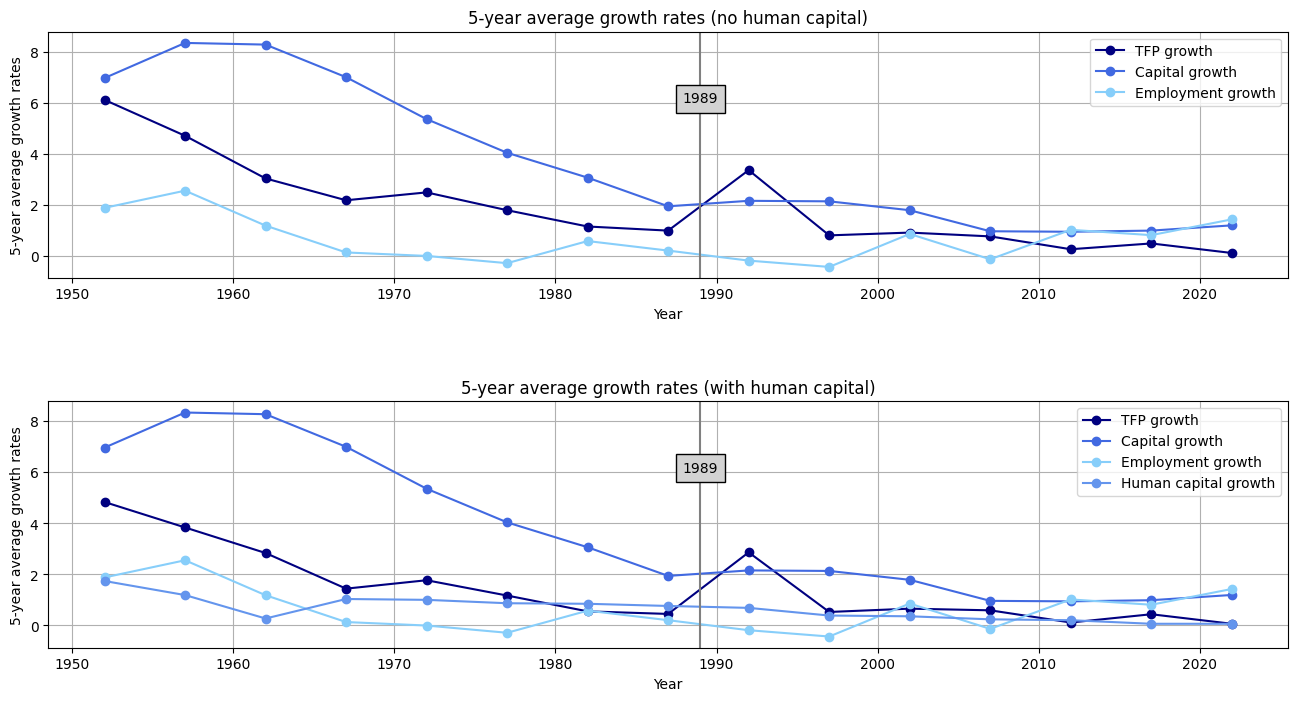

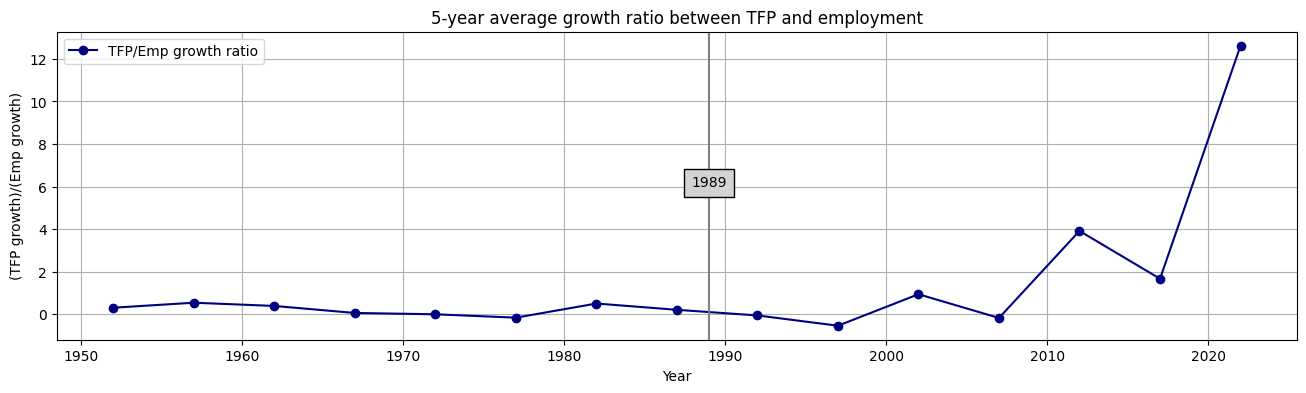

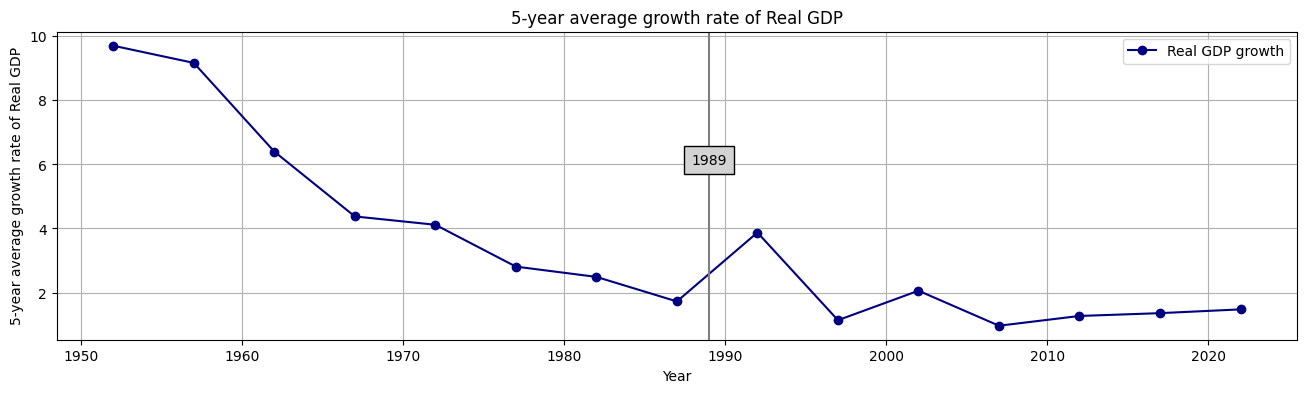

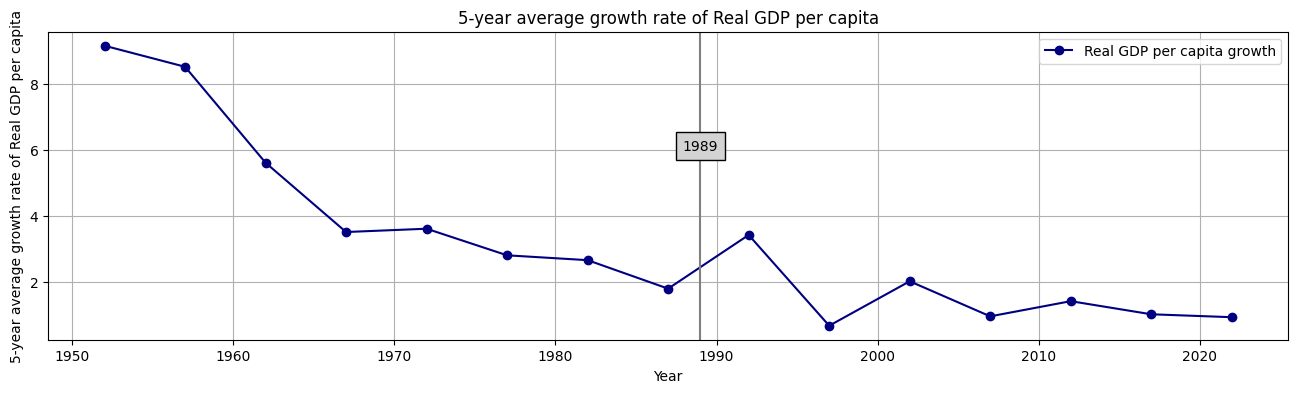

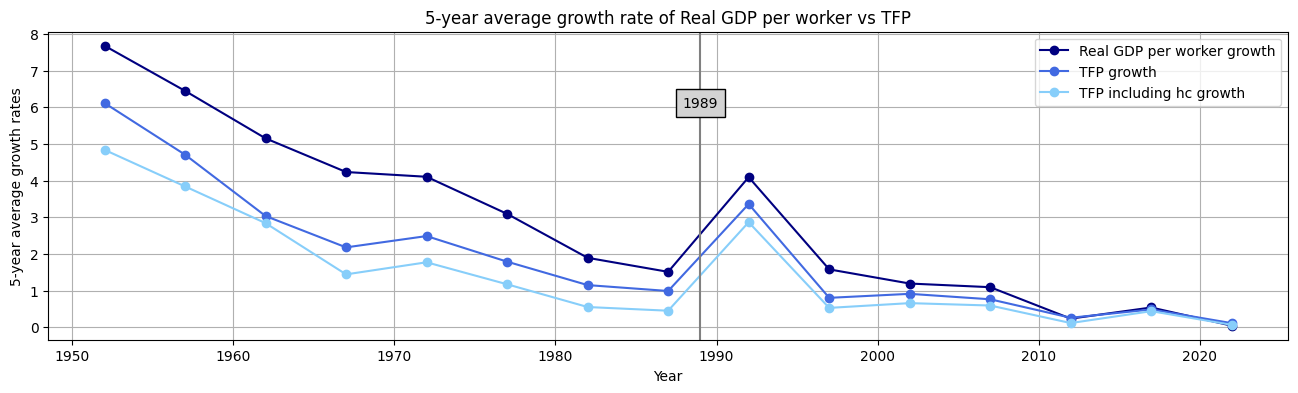

In [ ]:
GA_data = [tfp_growth, tfp_hc_growth, rnna_growth, hc_growth, emp_growth, rgdpna_growth, rgdpna_pw_growth]
GA_df = pd.DataFrame({
    "tfp_growth": tfp_growth,
    "tfp_hc_growth": tfp_hc_growth,
    "rnna_growth": rnna_growth,
    "hc_growth": hc_growth,
    "emp_growth": emp_growth,
    "rgdpna_growth": rgdpna_growth,
    "rgdpna_pc_growth": rgdpna_pc_growth,
    "rgdpna_pw_growth": rgdpna_pw_growth,
})

GA_df = GA_df.drop(GA_df.index[0])

GA_df.index = year[1:]
GA_df.index = pd.to_datetime(GA_df.index, format='%Y')
GA_df_5year = GA_df.resample('5Y').mean()

GA_df_5year.insert(7, "tfp_emp_growth_ratio", GA_df_5year["emp_growth"] / GA_df_5year["tfp_growth"])

fig = plt.figure(figsize = (16,8))

(ax1, ax2) = fig.subplots(2,1)

ax1.plot(GA_df_5year.index, GA_df_5year["tfp_growth"], label="TFP growth", color="navy", marker="o")
ax1.plot(GA_df_5year.index, GA_df_5year["rnna_growth"], label="Capital growth", color="royalblue", marker="o")
ax1.plot(GA_df_5year.index, GA_df_5year["emp_growth"], label="Employment growth", color="lightskyblue", marker="o")
ax1.set_title("5-year average growth rates (no human capital)")
ax1.set_xlabel("Year")
ax1.set_ylabel("5-year average growth rates")
ax1.grid(True)
ax1.axvline(pd.to_datetime('1989-01-01'), color="gray")
ax1.text(pd.to_datetime("1989-01-01"), 6, "1989", bbox ={'facecolor':'lightgray','alpha':1,'pad':5}, horizontalalignment = 'center')
ax1.legend()

ax2.plot(GA_df_5year.index, GA_df_5year["tfp_hc_growth"], label="TFP growth", color="navy", marker="o")
ax2.plot(GA_df_5year.index, GA_df_5year["rnna_growth"], label="Capital growth", color="royalblue", marker="o")
ax2.plot(GA_df_5year.index, GA_df_5year["emp_growth"], label="Employment growth", color="lightskyblue", marker="o")
ax2.plot(GA_df_5year.index, GA_df_5year["hc_growth"], label="Human capital growth", color="cornflowerblue", marker="o")
ax2.set_title("5-year average growth rates (with human capital)")
ax2.set_xlabel("Year")
ax2.set_ylabel("5-year average growth rates")
ax2.grid(True)
ax2.axvline(pd.to_datetime('1989-01-01'), color="gray")
ax2.text(pd.to_datetime("1989-01-01"), 6, "1989", bbox ={'facecolor':'lightgray','alpha':1,'pad':5}, horizontalalignment = 'center')
ax2.legend()

plt.subplots_adjust(hspace=0.5)

fig = plt.figure(figsize=(16,4))

ax = fig.subplots(1,1)

ax.plot(GA_df_5year.index, GA_df_5year["tfp_emp_growth_ratio"], label="TFP/Emp growth ratio", color="navy", marker="o")
ax.set_title("5-year average growth ratio between TFP and employment")
ax.set_xlabel("Year")
ax.set_ylabel("(TFP growth)/(Emp growth)")
ax.grid(True)
ax.axvline(pd.to_datetime('1989-01-01'), color="gray")
ax.text(pd.to_datetime("1989-01-01"), 6, "1989", bbox ={'facecolor':'lightgray','alpha':1,'pad':5}, horizontalalignment = 'center')
ax.legend()

fig = plt.figure(figsize=(16,4))

ax = fig.subplots(1,1)

ax.plot(GA_df_5year.index, GA_df_5year["rgdpna_growth"], label="Real GDP growth", color="navy", marker="o")
ax.set_title("5-year average growth rate of Real GDP")
ax.set_xlabel("Year")
ax.set_ylabel("5-year average growth rate of Real GDP")
ax.grid(True)
ax.axvline(pd.to_datetime('1989-01-01'), color="gray")
ax.text(pd.to_datetime("1989-01-01"), 6, "1989", bbox ={'facecolor':'lightgray','alpha':1,'pad':5}, horizontalalignment = 'center')
ax.legend()

fig = plt.figure(figsize=(16,4))

ax = fig.subplots(1,1)

ax.plot(GA_df_5year.index, GA_df_5year["rgdpna_pc_growth"], label="Real GDP per capita growth", color="navy", marker="o")
ax.set_title("5-year average growth rate of Real GDP per capita")
ax.set_xlabel("Year")
ax.set_ylabel("5-year average growth rate of Real GDP per capita")
ax.grid(True)
ax.axvline(pd.to_datetime('1989-01-01'), color="gray")
ax.text(pd.to_datetime("1989-01-01"), 6, "1989", bbox ={'facecolor':'lightgray','alpha':1,'pad':5}, horizontalalignment = 'center')
ax.legend()

fig = plt.figure(figsize=(16,4))

ax = fig.subplots(1,1)

ax.plot(GA_df_5year.index, GA_df_5year["rgdpna_pw_growth"], label="Real GDP per worker growth", color="navy", marker="o")
ax.plot(GA_df_5year.index, GA_df_5year["tfp_growth"], label="TFP growth", color="royalblue", marker="o")
ax.plot(GA_df_5year.index, GA_df_5year["tfp_hc_growth"], label="TFP including hc growth", color="lightskyblue", marker="o")
ax.set_title("5-year average growth rate of Real GDP per worker vs TFP")
ax.set_xlabel("Year")
ax.set_ylabel("5-year average growth rates")
ax.grid(True)
ax.axvline(pd.to_datetime('1989-01-01'), color="gray")
ax.text(pd.to_datetime("1989-01-01"), 6, "1989", bbox ={'facecolor':'lightgray','alpha':1,'pad':5}, horizontalalignment = 'center')
ax.legend()

# **Labour Productivity**

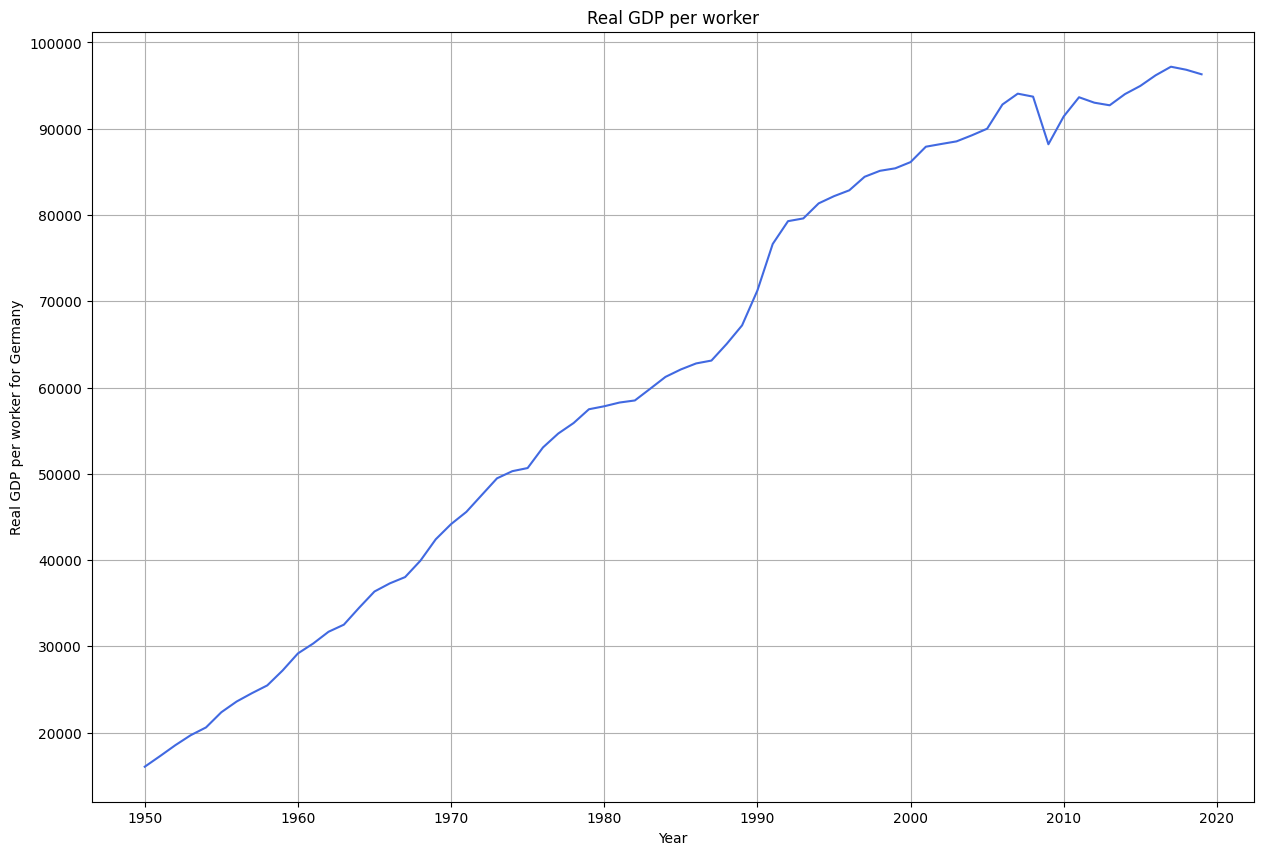

In [ ]:
# GDP per worker time series

fig = plt.figure(figsize=(15,10))

ax = fig.subplots(1,1)

ax.plot(data["year"], data["rgdpna_pw"], color="royalblue")
ax.set_ylabel("Real GDP per worker for " + country_selection)
ax.set_xlabel("Year")
ax.set_title("Real GDP per worker")
ax.grid(True)

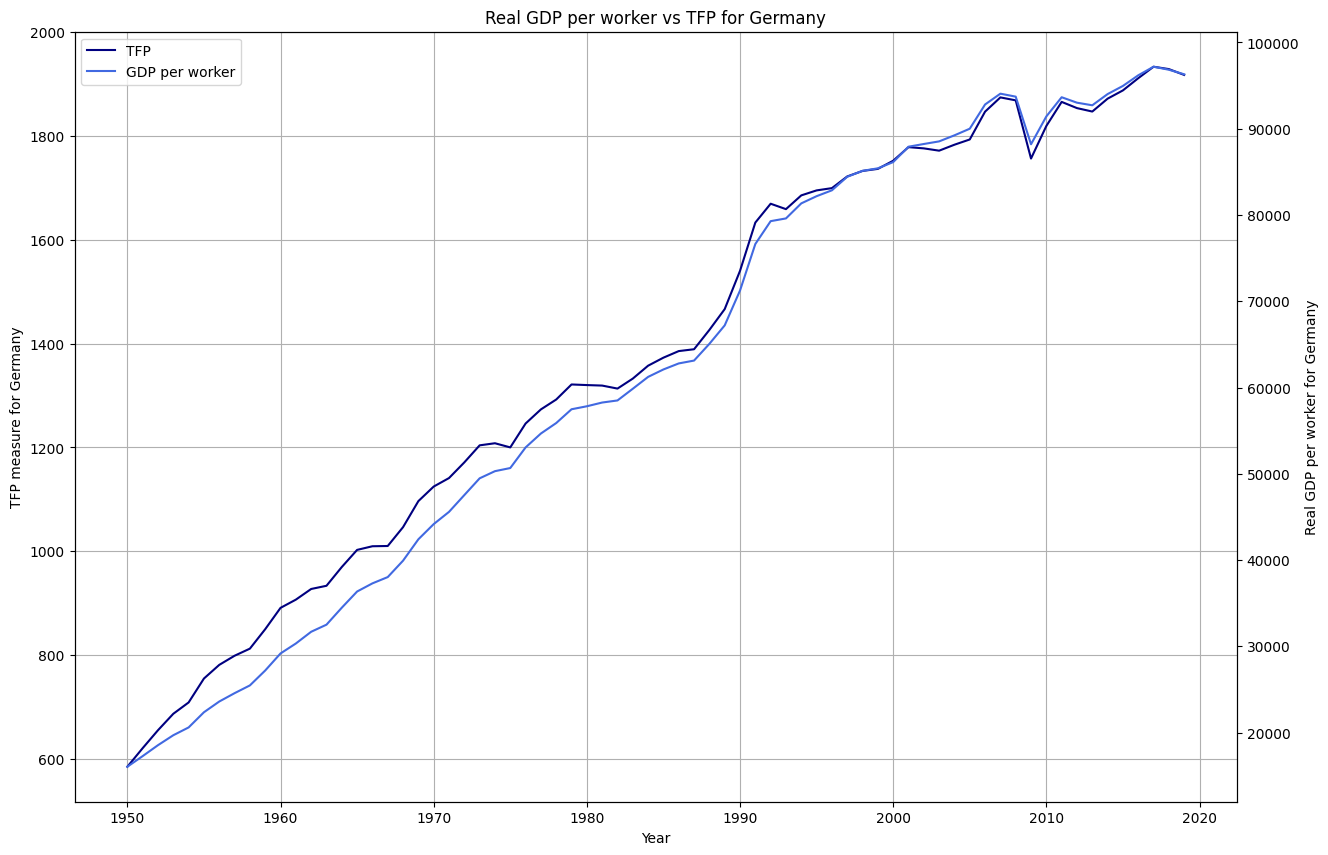

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = fig.subplots(1,1)

ax.plot(data["year"], data["TFP"], label="TFP", color="navy")
ax.set_ylabel("TFP measure for " + country_selection)
ax.set_xlabel("Year")
ax.set_title("Real GDP per worker vs TFP for " + country_selection)
ax.grid(True)

ax1 = ax.twinx()
ax1.plot(data["year"], data["rgdpna_pw"], label="GDP per worker", color="royalblue")
ax1.set_ylabel("Real GDP per worker for " + country_selection)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2)